In [23]:
# RAPIDS SVC w/ Feature Engineering - [LB 0.856]
# https://www.kaggle.com/code/cdeotte/rapids-svc-w-feature-engineering-lb-0-856

# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# モデル
from sklearn.model_selection import KFold, GroupKFold
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC, LinearSVC

import warnings
warnings.filterwarnings("ignore")

# pandasの操作をGPUで処理できるようになる拡張機能(なんか使えなかったからコメントアウトした)
# %load_ext cudf.pandas

#sklearnの操作をGPUで処理できるようになるライブラリ(windowsでは使用できないらしい)
# from cuml.svm import SVC, LinearSVC

In [24]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

train_df['year_group'] = train_df['id'] // 365

print("Train shape: ", train_df.shape)
print("Test shape: ", test_df.shape)

display(train_df.head())
display(test_df.head())

Train shape:  (2190, 14)
Test shape:  (730, 12)


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,year_group
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,0
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,0
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,0
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,0
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,0


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [25]:
RMV = ['rainfall', 'id', 'bucket', 'year_group']
FEATURES = [c for c in list(train_df.columns) if not c in RMV]
print(f"We have {len(FEATURES)} basic features:")
print(FEATURES)

We have 11 basic features:
['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


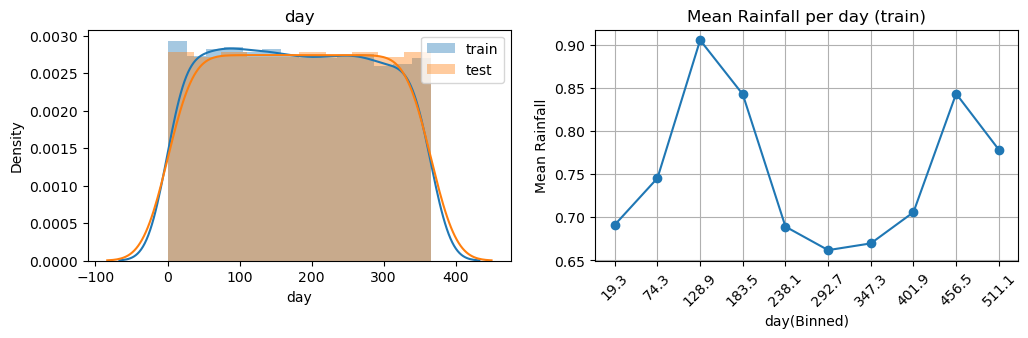

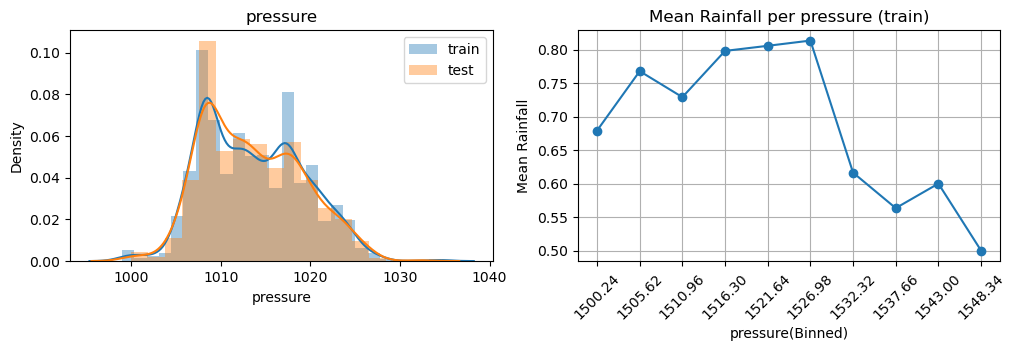

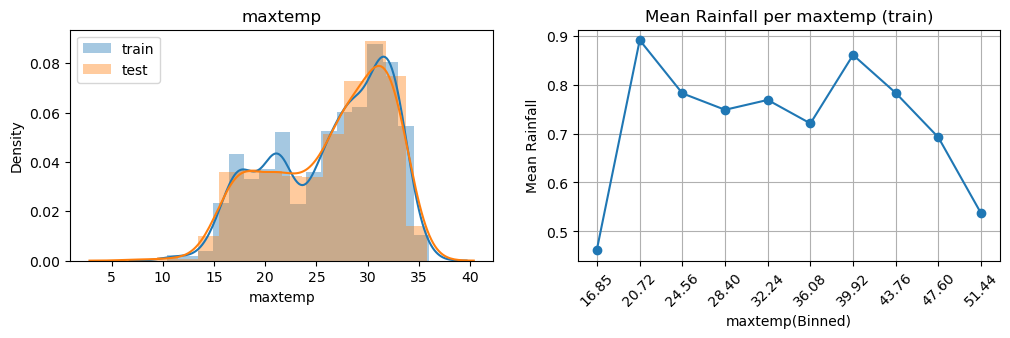

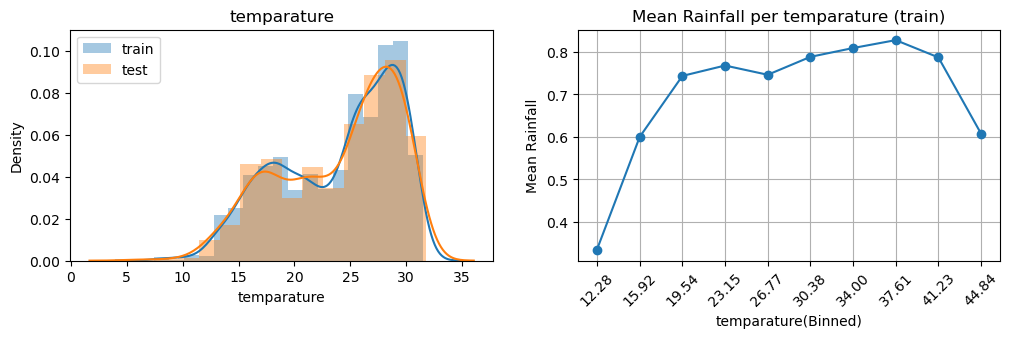

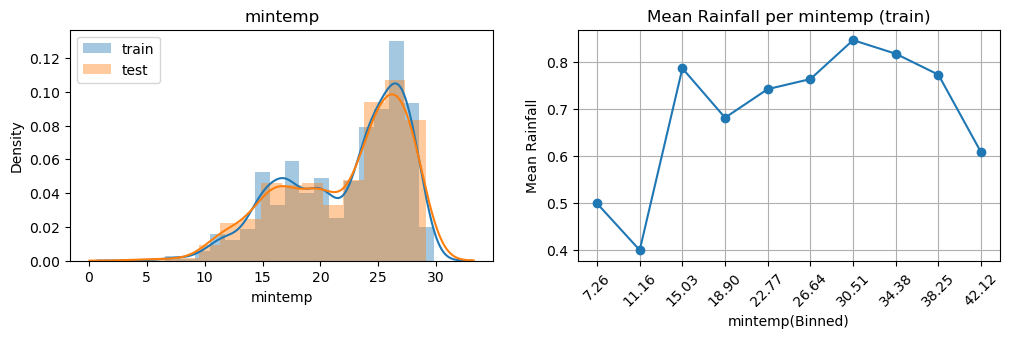

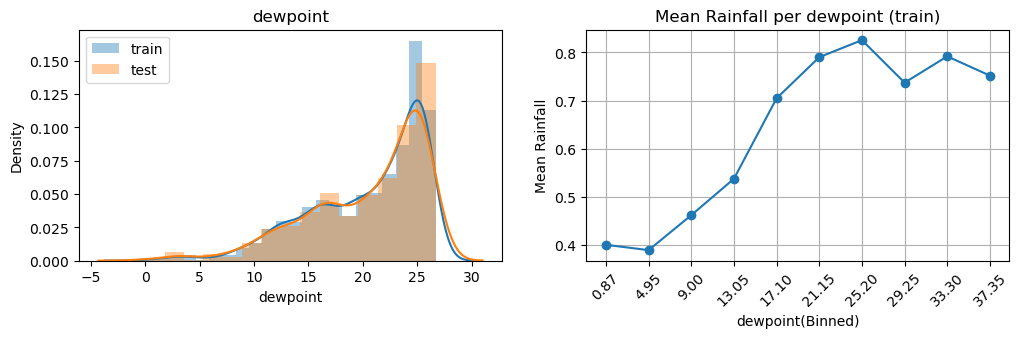

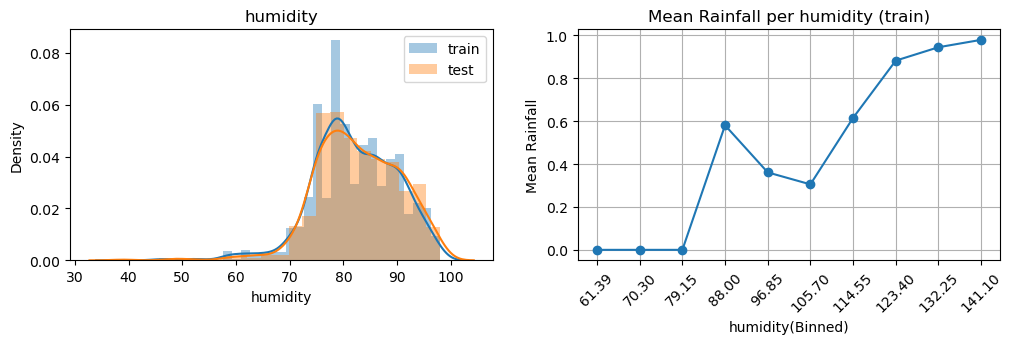

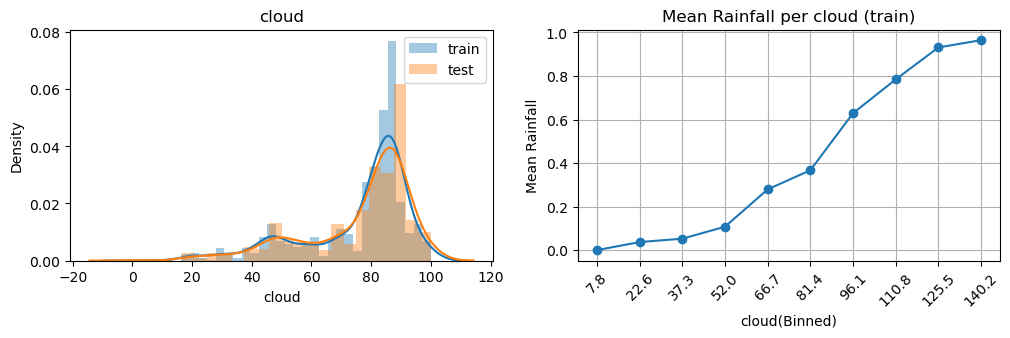

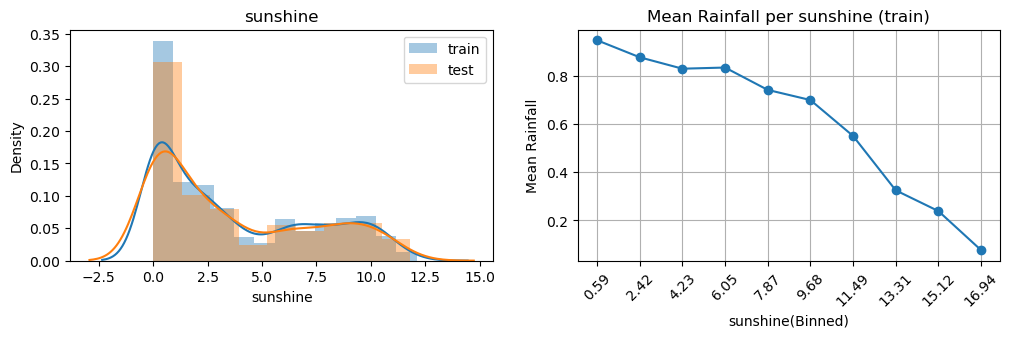

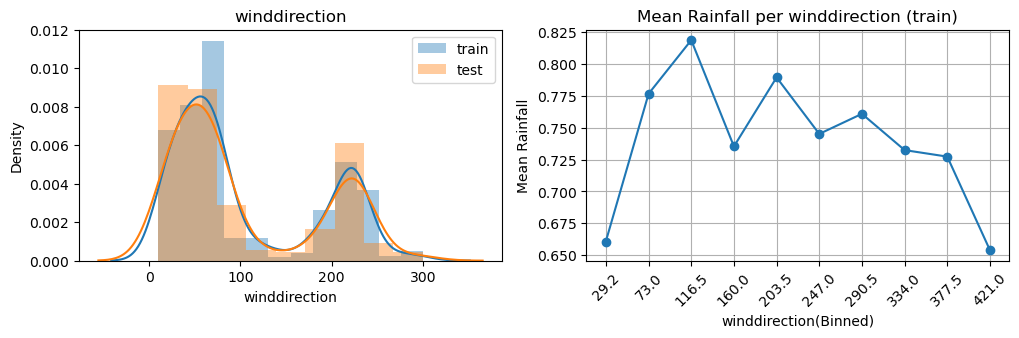

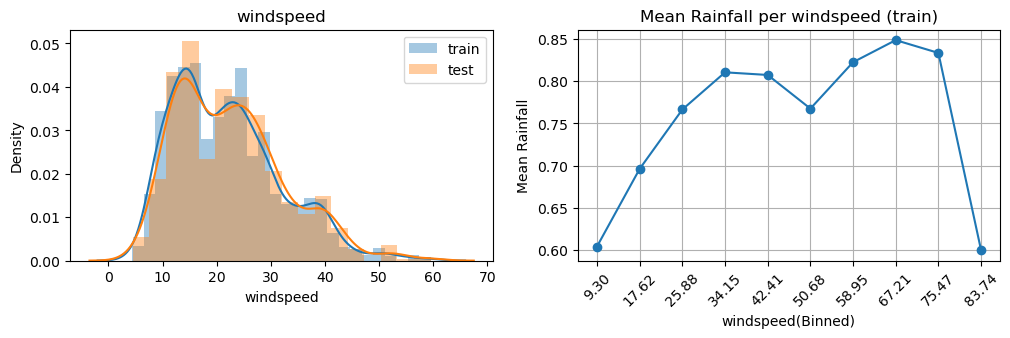

In [26]:
for c in FEATURES:
    
    # トレーニングデータとテストデータの比較
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    sns.distplot(train_df[c], label='train')
    sns.distplot(test_df[c], label='test')
    plt.legend()
    plt.title(f"{c}")

    # ターゲットとビンカされた特徴の関係を分析する
    plt.subplot(1, 2, 2)
    train_df['bucket'], bin_edges = pd.cut(train_df[c], bins=10, retbins=True, labels=False)
    bucket_means = train_df.groupby('bucket')['rainfall'].mean()
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:] / 2)
    plt.plot(bin_midpoints, bucket_means, marker='o', linestyle='-')
    plt.xlabel(f'{c}(Binned)')
    plt.ylabel('Mean Rainfall')
    plt.title(f'Mean Rainfall per {c} (train)')
    plt.xticks(bin_midpoints, rotation=45)
    plt.grid()

    plt.show()

In [28]:
INTERACT = []
for i, c1 in enumerate(FEATURES):
    for j, c2 in enumerate(FEATURES[i+1: ]):
        n = f"{c1}_{c2}"
        train_df[n] = train_df[c1] * train_df[c2]
        test_df[n] = test_df[c1] * test_df[c2]
        INTERACT.append(n)
print(f"There are {len(INTERACT)} interaction features:")
print( INTERACT)

There are 55 interaction features:
['day_pressure', 'day_maxtemp', 'day_temparature', 'day_mintemp', 'day_dewpoint', 'day_humidity', 'day_cloud', 'day_sunshine', 'day_winddirection', 'day_windspeed', 'pressure_maxtemp', 'pressure_temparature', 'pressure_mintemp', 'pressure_dewpoint', 'pressure_humidity', 'pressure_cloud', 'pressure_sunshine', 'pressure_winddirection', 'pressure_windspeed', 'maxtemp_temparature', 'maxtemp_mintemp', 'maxtemp_dewpoint', 'maxtemp_humidity', 'maxtemp_cloud', 'maxtemp_sunshine', 'maxtemp_winddirection', 'maxtemp_windspeed', 'temparature_mintemp', 'temparature_dewpoint', 'temparature_humidity', 'temparature_cloud', 'temparature_sunshine', 'temparature_winddirection', 'temparature_windspeed', 'mintemp_dewpoint', 'mintemp_humidity', 'mintemp_cloud', 'mintemp_sunshine', 'mintemp_winddirection', 'mintemp_windspeed', 'dewpoint_humidity', 'dewpoint_cloud', 'dewpoint_sunshine', 'dewpoint_winddirection', 'dewpoint_windspeed', 'humidity_cloud', 'humidity_sunshine', 'h

In [ ]:
ADD = []
best_auc =0
best_oof = None
best_pred = None 

for kx, col in enumerate()

